In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [42]:
data=pd.read_csv('/home/tejaswini/Downloads/HR_data.csv')
data.head(5)

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [43]:
data['Status'].value_counts()/len(data)*100
# here we can see the percentage of each class 

Joined        81.300723
Not Joined    18.699277
Name: Status, dtype: float64

#### we can observe there is an imbalance in the data
we need to balance it by doing upsampling

In [44]:
data['Status'].replace(['Joined','Not Joined'],[0,1],inplace=True)#replace categorical data

In [45]:
corr=data.corr()

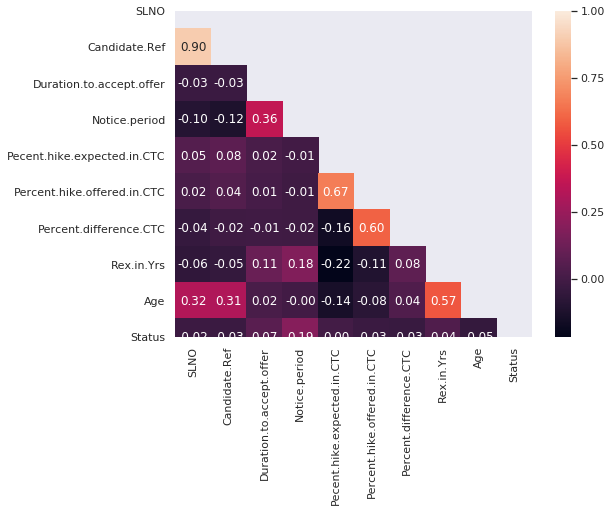

In [46]:
plt.figure(figsize=(8,6))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,fmt='0.2f',mask=mask)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
#splitting the data into independent and dependent
X=data.iloc[:,:-1]#independent variable
Y=data.iloc[:,-1]#dependent variable


In [49]:
#Create dummies
dum=pd.get_dummies(X)
dum.head()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,DOJ.Extended_No,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,1,2110407,14,30,-20.79,13.16,42.86,7,34,0,...,0,0,0,0,0,0,0,1,0,0
1,2,2112635,18,30,50.00,320.00,180.00,8,34,1,...,0,1,0,0,0,0,0,0,0,0
2,3,2112838,3,45,42.84,42.84,0.00,4,27,1,...,0,0,0,0,0,0,0,1,0,0
3,4,2115021,26,30,42.84,42.84,0.00,4,34,1,...,0,0,0,0,0,0,0,1,0,0
4,5,2115125,1,120,42.59,42.59,0.00,6,34,0,...,0,0,0,0,0,0,0,1,0,0


# Upsampling

In [50]:
#split the data into two parts
#sample=0 and sample=1
df_yes=data[data['Status']==0]
df_no=data[data['Status']==1]
#to reduce biasing,the technique used is upsampling

In [51]:
from sklearn.utils import resample

In [52]:
df_no_sample=resample(df_no,replace=True,n_samples=4000)

In [53]:
df_no_sample['Status'].value_counts()/len(data)

1    0.444691
Name: Status, dtype: float64

In [54]:
data_resam=pd.concat((df_no,df_yes,df_no_sample),axis=0)
data_resam

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
10,13,2151180,No,120,30,E2,5.26,-60.53,-62.50,No,No,Male,Employee Referral,3,INFRA,Noida,34,1
12,15,2156236,Yes,14,30,E2,50.00,287.50,158.33,No,No,Male,Agency,7,INFRA,Noida,29,1
13,16,2158703,No,44,75,E2,45.45,60.00,10.00,No,No,Male,Direct,8,INFRA,Noida,34,1
14,17,2161257,No,7,30,E3,53.85,50.00,-2.50,No,No,Male,Employee Referral,5,INFRA,Noida,34,1
16,19,2166041,Yes,98,30,E2,50.00,165.36,76.91,No,No,Male,Agency,8,INFRA,Noida,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,9351,3337688,No,6,30,E1,28.57,28.57,0.00,No,No,Male,Direct,6,ERS,Chennai,34,1
6614,8575,3283313,No,0,30,E1,41.59,21.24,-14.38,No,No,Male,Direct,4,ERS,Chennai,28,1
5703,7479,3204239,No,8,30,E1,36.00,20.00,-11.76,No,No,Male,Employee Referral,4,AXON,Chennai,29,1
4183,5595,2594940,Yes,3,30,E1,29.31,25.86,-2.67,No,No,Male,Direct,4,ETS,Bangalore,27,1


In [55]:
data_resam['Status'].value_counts()

0    7313
1    5682
Name: Status, dtype: int64

In [56]:
data_resam.to_csv('data_HR_resample.csv')
data_resam.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
10,13,2151180,No,120,30,E2,5.26,-60.53,-62.50,No,No,Male,Employee Referral,3,INFRA,Noida,34,1
12,15,2156236,Yes,14,30,E2,50.00,287.50,158.33,No,No,Male,Agency,7,INFRA,Noida,29,1
13,16,2158703,No,44,75,E2,45.45,60.00,10.00,No,No,Male,Direct,8,INFRA,Noida,34,1
14,17,2161257,No,7,30,E3,53.85,50.00,-2.50,No,No,Male,Employee Referral,5,INFRA,Noida,34,1
16,19,2166041,Yes,98,30,E2,50.00,165.36,76.91,No,No,Male,Agency,8,INFRA,Noida,36,1


# check multicolinearity

In [57]:
corr=data_resam.corr()

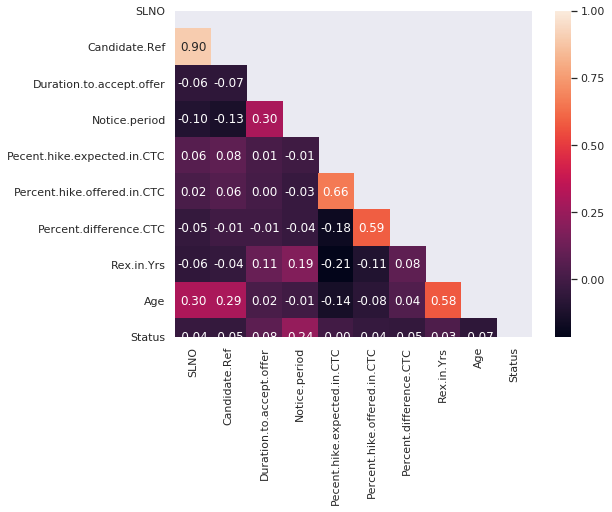

In [58]:
plt.figure(figsize=(8,6))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,fmt='0.2f',mask=mask)

the correlation is very low and there is some correlation at sl no and candidate ref no
 we can ignore this as there is no use of it

In [59]:
#splitting the data into independent and dependent
X=data_resam.iloc[:,:-1]#independent variable
Y=data_resam.iloc[:,-1]#dependent variable
X

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age
10,13,2151180,No,120,30,E2,5.26,-60.53,-62.50,No,No,Male,Employee Referral,3,INFRA,Noida,34
12,15,2156236,Yes,14,30,E2,50.00,287.50,158.33,No,No,Male,Agency,7,INFRA,Noida,29
13,16,2158703,No,44,75,E2,45.45,60.00,10.00,No,No,Male,Direct,8,INFRA,Noida,34
14,17,2161257,No,7,30,E3,53.85,50.00,-2.50,No,No,Male,Employee Referral,5,INFRA,Noida,34
16,19,2166041,Yes,98,30,E2,50.00,165.36,76.91,No,No,Male,Agency,8,INFRA,Noida,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,9351,3337688,No,6,30,E1,28.57,28.57,0.00,No,No,Male,Direct,6,ERS,Chennai,34
6614,8575,3283313,No,0,30,E1,41.59,21.24,-14.38,No,No,Male,Direct,4,ERS,Chennai,28
5703,7479,3204239,No,8,30,E1,36.00,20.00,-11.76,No,No,Male,Employee Referral,4,AXON,Chennai,29
4183,5595,2594940,Yes,3,30,E1,29.31,25.86,-2.67,No,No,Male,Direct,4,ETS,Bangalore,27


In [60]:
#Create dummies
dum=pd.get_dummies(X)
dum.head()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,DOJ.Extended_No,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
10,13,2151180,120,30,5.26,-60.53,-62.50,3,34,1,...,0,0,0,0,0,0,0,1,0,0
12,15,2156236,14,30,50.00,287.50,158.33,7,29,0,...,0,0,0,0,0,0,0,1,0,0
13,16,2158703,44,75,45.45,60.00,10.00,8,34,1,...,0,0,0,0,0,0,0,1,0,0
14,17,2161257,7,30,53.85,50.00,-2.50,5,34,1,...,0,0,0,0,0,0,0,1,0,0
16,19,2166041,98,30,50.00,165.36,76.91,8,36,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
X.drop(columns='SLNO',inplace=True)

In [62]:
X.shape,Y.shape,Y.dtypes

((12995, 16), (12995,), dtype('int64'))

In [63]:
Xnew=sm.add_constant(X)
Xnew.head(1)

,const,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age
10,1.0,2151180,No,120,30,E2,5.26,-60.53,-62.5,No,No,Male,Employee Referral,3,INFRA,Noida,34


In [64]:
model_1=sm.OLS(Y,Xnew).fit()
print(model_1.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
np.asarray(Y)

In [ ]:
#spliting into training and testing
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dum,Y,test_size=0.3)#30% data to test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train) #training

In [ ]:
#for training data calculate prob values
y_pred_train=model.predict_proba(x_train)
y_pred_train_0=y_pred_train[:,0]

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
class threshold():
    def __init(self):
        self.th=0.5
    def predict_threshold(self,y):
        if y>=self.th:
            return 1
        else:
            return 0

In [ ]:
y_pred_prob_0=y_pred_train_0
probabilities=np.linspace(0,1,num=100)#generating 100 values in 0 to 1
pre=threshold()
mle=[]
for p in probabilities:
    pre.th=p
    yy=pd.Series(y_pred_prob_0)
    y_pred_1_=yy.apply(pre.predict_threshold)
    loss=log_loss(y_train,y_pred_1_)
    mle.append(loss)

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(probabilities,mle,'ro--')
plt.plot(probabilities,mle,'b--')
ind=np.array(mle).argmin()
mx=max(mle)
val=probabilities[ind]
print('Threshold probability value',val)
plt.plot([val,val],[0,mx],'g')
for i,p in enumerate(probabilities):
    plt.text(probabilities[i],mle[i],'%0.2f'%(p))

    
    
plt.xlabel('Probabilities')
plt.ylabel('-(Log Likelihood)')
plt.title('Maximum Likelihood Estimation')
plt.show()

## Therefore the probability of the candidate joining the company was 0.60